In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv


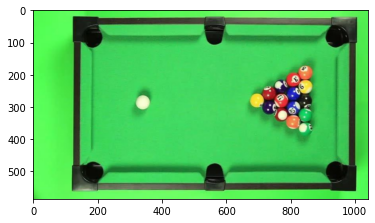

In [ ]:
image = cv.imread("/content/Screenshot from 2022-03-26 12-51-22.png", cv.IMREAD_UNCHANGED)
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image= cv.cvtColor(image, cv.COLOR_BGR2RGB)
img = cv.imread("/content/Screenshot from 2022-03-26 12-51-22.png")
#rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

In [ ]:
rgb


array([[[ 83, 252,  75],
        [ 83, 252,  75],
        [ 83, 252,  75],
        ...,
        [ 83, 243,  83],
        [ 83, 243,  83],
        [ 83, 242,  83]],

       [[ 81, 252,  75],
        [ 81, 252,  75],
        [ 81, 252,  75],
        ...,
        [ 83, 243,  83],
        [ 83, 243,  83],
        [ 83, 242,  83]],

       [[ 81, 252,  75],
        [ 81, 252,  75],
        [ 81, 252,  75],
        ...,
        [ 83, 243,  83],
        [ 83, 243,  83],
        [ 83, 242,  83]],

       ...,

       [[ 70, 197,  58],
        [ 71, 199,  60],
        [ 73, 202,  61],
        ...,
        [ 81, 252,  86],
        [ 81, 252,  86],
        [ 80, 250,  85]],

       [[ 70, 194,  56],
        [ 72, 196,  58],
        [ 74, 199,  61],
        ...,
        [ 81, 252,  86],
        [ 81, 252,  86],
        [ 80, 250,  85]],

       [[ 70, 191,  55],
        [ 72, 193,  57],
        [ 73, 196,  59],
        ...,
        [ 81, 252,  86],
        [ 81, 252,  86],
        [ 80, 250,  85]]

In [ ]:
rows = image_gray.shape[0]

[[[846 238  21]
  [340 286  22]
  [808 348  21]
  [736 300  24]
  [846 194  21]
  [808 220  24]
  [564  84  24]
  [846 322  24]
  [846 368  21]
  [774 280  24]
  [806 304  24]
  [564 500  24]
  [772 322  24]
  [770 240  22]
  [844 282  22]
  [732 256  21]
  [576 540  24]
  [694 280  21]
  [196 506  24]
  [572  44  24]
  [810 262  24]
  [934 502  24]
  [186  94  24]
  [244  54  24]
  [908 544  21]
  [724 228  21]]]


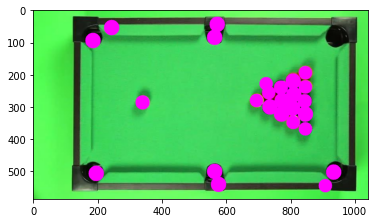

In [ ]:
minRadius = 20 #r@param {type:"slider", min:0, max:100, step:1}
maxRadius = 25 #r@param {type:"slider", min:0, max:100, step:1}
image_final = np.copy(image)
circles = cv.HoughCircles(image_gray,
                           cv.HOUGH_GRADIENT,
                           1,
                           minDist=30,
                           param1=100,
                           param2=10,
                           minRadius=minRadius,
                           maxRadius=maxRadius)
if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            # circle center
            #cv.circle(image, center, 1, (0, 100, 100), 3)
            # circle outline
            radius = i[2]
            cv.circle(image_final, center, radius, (255, 0, 255), -1)
plt.imshow(image_final)
print(circles)

amarillo
[129 162   0]
[255 255 109]
azul
[  0   0 115]
[ 78 100 255]
violeta
[10  0 41]
[63 37 94]
verde
[  0 164   0]
[ 26 255 255]
naranja
[202 104   0]
[255 164  88]
rojo
[194  24   0]
[255  96  76]
guindo
[96  0  0]
[198  84 255]

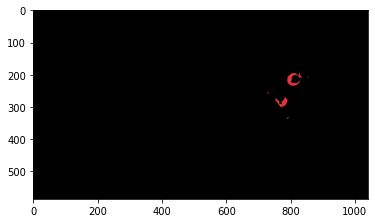

In [ ]:
def mask(img,lower,upper):
  return cv.inRange(img,np.array(lower),np.array(upper))

# Identificación de los colores
image_c = np.copy(image)


yellow_balls = mask(image_c,[129,162,0], [255,255,109])
blue_balls = mask(image_c,[0,0,115],[78,100,255])
violet_balls = mask(image_c,[10,0,41],[63,37,94])
green_balls = mask(image_c,[0,64,0],[26,255,255])
orange_balls = mask(image_c,[202,104,0],[255,164,88])
red_balls = mask(image_c,[194,24,0],[255,96,76])
fux_balls = mask(image_c,[96,0,0],[198,84,255])

list_balls = np.array([yellow_balls,
                      blue_balls,
                      violet_balls,
                      green_balls,
                      orange_balls,
                      red_balls,
                      fux_balls])

kernal = np.ones((1,1),"uint8")
red = cv.morphologyEx(red_balls,cv.MORPH_OPEN,kernal)
red = cv.dilate(red,kernal,iterations=1)

res1=cv.bitwise_and(image, image, mask = red)

plt.imshow(res1)
plt.show()

In [ ]:
#print(circles[0,0:1])


#mask = np.uint8(np.zeros((image.shape[0],image.shape[1])))
#cv.circle(mask, (i[0,0],i[0,1]), i[0,2], 255, -1)

holes = []
coordinates = []
for idx, coord in enumerate(circles[0,:]):
  bitw = cv.circle(np.uint8(np.zeros((image.shape[0],image.shape[1]))),
                         (coord[0],coord[1]), coord[2], 255, -1)
  holes.append(bitw)
  coordinates.append(coord)
masks = []
cropped_holes = []
for idx, i in enumerate(holes):

  for idy, kj in enumerate(list_balls):
    m = cv.bitwise_and(list_balls[idy],holes[idx]) #aquí se separan las bolas
    x = coordinates[idx][0]
    y = coordinates[idx][1]
    r = 25
    cropped = m[y-r:y+r, x-r:x+r]
    th, im_th = cv.threshold(cropped, 250, 255, cv.THRESH_BINARY)
    if (np.mean(im_th) > 10):
      masks.append(m)
      print(idx, coordinates[idx],np.mean(cropped))
      cropped_holes.append(cropped)
      #print(np.mean(cropped))
      break #esto no debería estar aqui pero solo es porque hay elementos que se repiten en la lista
#recortar y superponer


0 [846 238  21] 76.908
2 [808 348  21] 89.556
3 [736 300  24] 82.62
4 [846 194  21] 70.584
5 [808 220  24] 69.666
7 [846 322  24] 77.622
8 [846 368  21] 28.152
9 [774 280  24] 51.918
10 [806 304  24] 45.39
12 [772 322  24] 57.936
13 [770 240  22] 48.246
15 [732 256  21] 102.102
17 [694 280  21] 130.458
20 [810 262  24] 90.984


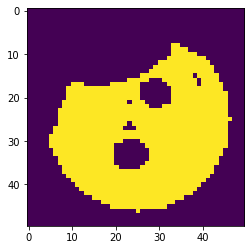

In [ ]:
plt.imshow(cropped_holes[11
                         ])

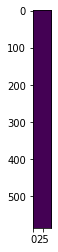

In [ ]:
plt.imshow(bitw[1:1000, 1:50])

In [ ]:
red_balls


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

[[[ 120  536 1004  536]]

 [[ 120  557 1004  557]]

 [[ 123   23 1006   23]]

 [[ 123   24 1007   24]]

 [[ 123   79 1007   79]]

 [[ 123   46 1007   46]]

 [[ 123   45 1007   45]]

 [[ 120  503 1005  503]]

 [[ 125  562  125   19]]

 [[1001  561 1001   21]]

 [[ 120  556 1004  556]]

 [[ 982  561  982   21]]

 [[ 145  562  145   19]]

 [[ 123   78 1007   78]]

 [[ 123   42 1007   42]]

 [[1002  561 1002   21]]

 [[ 120  535 1004  535]]

 [[ 126  562  126   19]]

 [[ 123   43 1007   43]]

 [[ 120  502 1005  502]]

 [[ 120  500 1005  500]]

 [[ 140  562  149   19]]

 [[ 123   47 1007   47]]

 [[ 981  561  981   21]]

 [[ 983  561  983   21]]]


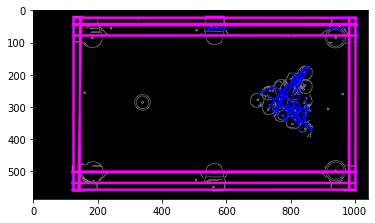

In [ ]:
image_lines = np.copy(image)

dstP = cv.Canny(image_lines, 50, 200, None, 3)

linesP = cv.HoughLinesP(dstP, 1, np.pi / 180, 100, None, columnas//2, columnas)

if linesP is not None:
  for i in range(0, len(linesP)):
    l = linesP[i][0]
    cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (255,0,255), 3, cv.LINE_AA)

print(linesP)
plt.imshow(cdstP)